In [1]:
import torch
import torchvision
import numpy as np
import random

In [2]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
ROOT = '.data'

train_data = torchvision.datasets.MNIST(root=ROOT, train=True, download=True)

In [10]:
mean = train_data.data.float().mean() / 225
std = train_data.data.float().std() / 225

print(f'data mean: {mean}')
print(f'data std: {std}')

data mean: 0.14808188378810883
data std: 0.34918883442878723


In [31]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomRotation(5, fill=(0, )),
    transforms.RandomCrop(28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

In [32]:
train_data = torchvision.datasets.MNIST(root=ROOT,
                                        train=True,
                                        download=True,
                                        transform=train_transforms)

test_data = torchvision.datasets.MNIST(root=ROOT,
                                       train=False,
                                       download=True,
                                       transform=test_transforms)

In [14]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


In [33]:
import matplotlib.pyplot as plt

def plot_images(images):
    n_images = len(images)
    rows = cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

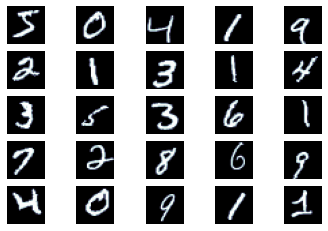

In [34]:
N_IMAGES = 25

# images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]
images = [train_data[i][0] for i in range(N_IMAGES)]

plot_images(images)

In [35]:
VALID_RATIO = 0.1

n_train_examples = int(len(train_data) * (1 - VALID_RATIO))
n_test_examples = int(len(train_data) * VALID_RATIO)

In [36]:
train_data, valid_data = torch.utils.data.random_split(train_data, [n_train_examples, n_test_examples])

In [40]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


In [50]:
import copy

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

Compose(
    ToTensor()
    Normalize(mean=[tensor(0.1481)], std=[tensor(0.3492)])
)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

train_iterator = DataLoader(train_data, BATCH_SIZE, True)
valid_iterator = DataLoader(valid_data, BATCH_SIZE, False)
test_iterator = DataLoader(test_data, BATCH_SIZE, False)